# Pulsar Stars - Project Proposal - Group 97

## The Classification of Pulsar Stars

### Introduction

Pulsar stars are a rare type of neutron star that produces radio emissions that humans on earth can detect. Pulsars each produce different emission patterns which can be measured with scientific equipment, one issue however, is that some positive detections are caused by radio frequency interference which makes real pulsar star detections difficult to find. 

Pulsars are important as they are scientific instruments to space time, interstellar medium and states of matter. As a result, determining if scientific equipment analyzed a real pulsar star or radio frequency interference would be the main objective of our data analysis.<br/> This leads into our question: 
__Using pulsar star candidate data recorded by scientific equipment, is a given candidate a true pulsar star or just radio frequency interference?__

Each observation in the provided data set is a candidate, with 8 continuous variables, and 1 class variable:<br />
1. Mean of the integrated profile. <br/>
2. Standard deviation of the integrated profile.<br />
3. Excess kurtosis of the integrated profile.<br />
4. Skewness of the integrated profile.<br />
5. Mean of the DM-SNR curve.<br />
6. Standard deviation of the DM-SNR curve.<br />
7. Excess kurtosis of the DM-SNR curve.<br />
8. Skewness of the DM-SNR curve.<br />


### Preliminary Exploratory Data Analysis

We can download the dataset from the website and import into Jupyter Hub. From there, we can preview the dataset and determine the appropriate read_* function to call. 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#reading data
star_data <- read_csv("data/HTRU_2.csv", col_names = c("mean_of_int_profiles", "sd_of_int_profiles", "excess_kurtosis_of_int_profiles",
                                                  "skewness_of_int_profiles", "mean_of_curve", "sd_of_curve", 
                                                  "excess_kurtosis_of_curve", "skewness_of_curve", "true_pulsar")) |>
    mutate(true_pulsar = as_factor(true_pulsar))
    
head(star_data)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): mean_of_int_profiles, sd_of_int_profiles, excess_kurtosis_of_int_pr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_of_int_profiles,sd_of_int_profiles,excess_kurtosis_of_int_profiles,skewness_of_int_profiles,mean_of_curve,sd_of_curve,excess_kurtosis_of_curve,skewness_of_curve,true_pulsar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


In [3]:
#splitting data into training and testing
pulsar_split <- initial_split(star_data, prop = 0.75, strata = true_pulsar)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

In [4]:
#Summarizing data into table counting if its pulsar or not
pulsar_frequency <- pulsar_train |>
    group_by(true_pulsar) |>
    summarize(n = n())
pulsar_frequency

true_pulsar,n
<fct>,<int>
0,12216
1,1207


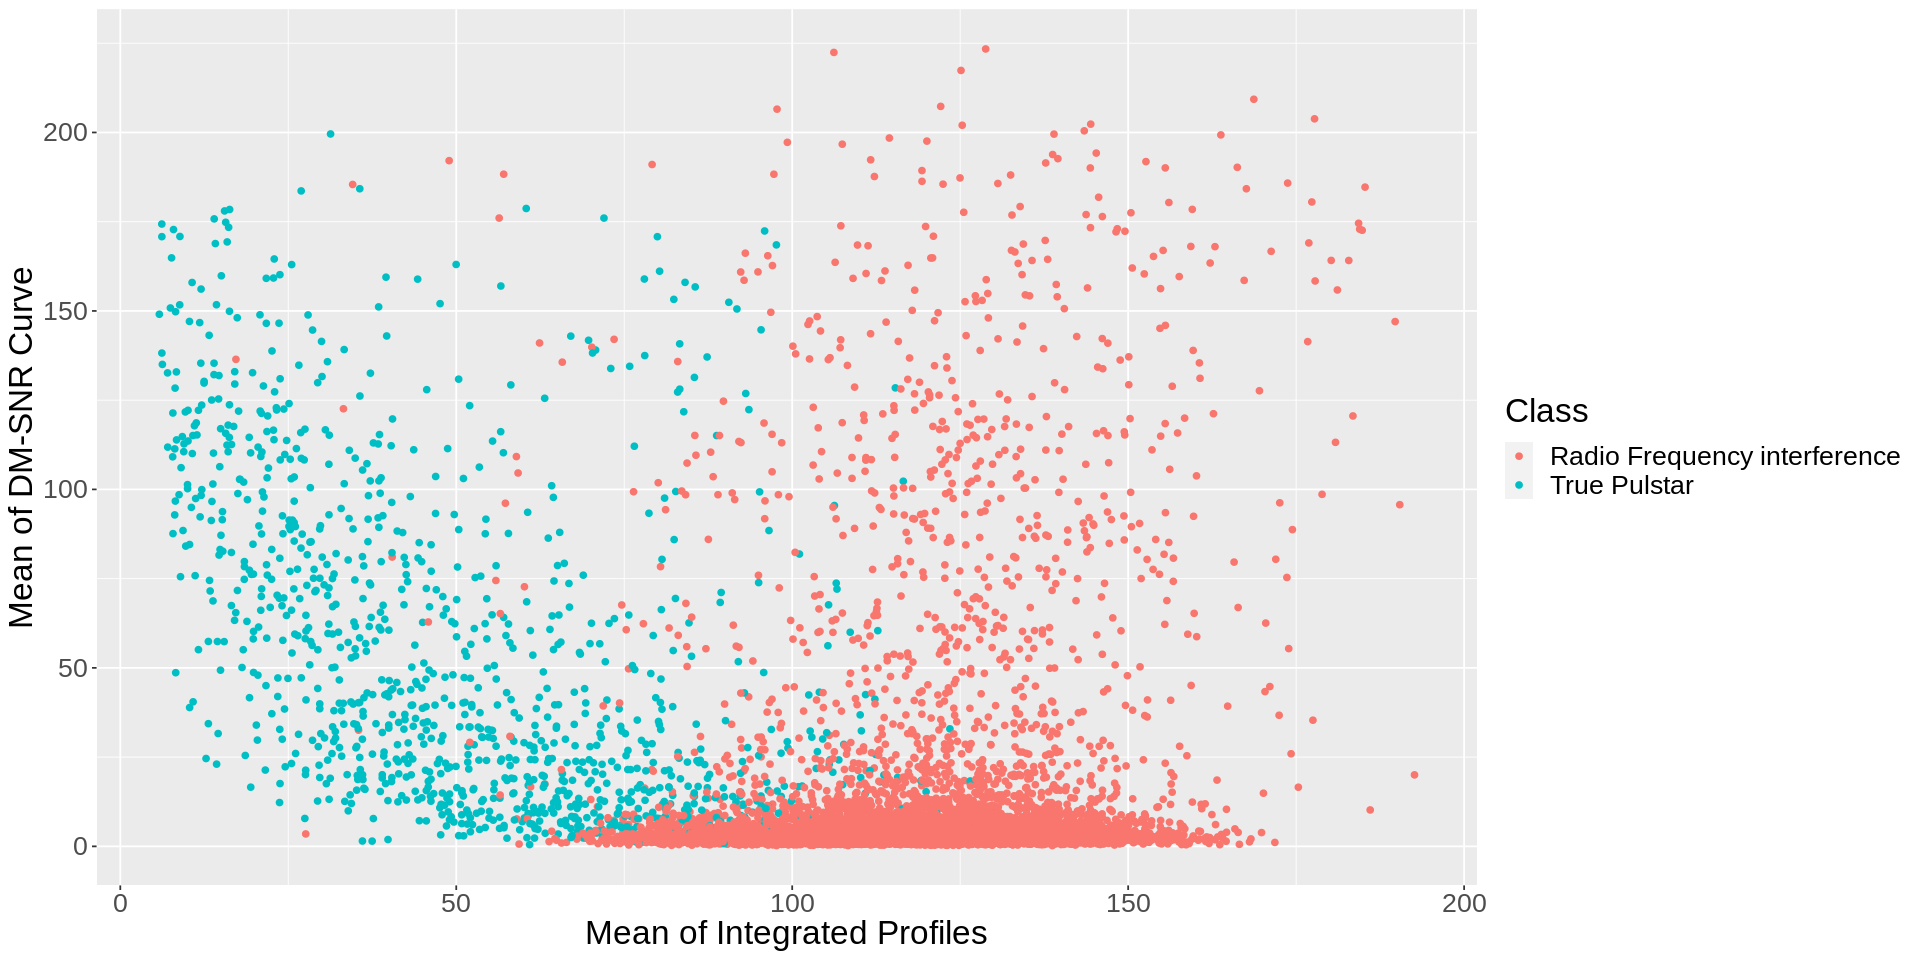

In [5]:
#Visualizing the mean and SD of integrated profile with colour to differentiate true pulars

options(repr.plot.width = 16, repr.plot.height = 8)

pulsar_plot <- pulsar_train |>
    ggplot(aes(x = mean_of_int_profiles, y = mean_of_curve)) +
           geom_point(aes(color = true_pulsar)) +
           labs(x = "Mean of Integrated Profiles", y = "Mean of DM-SNR Curve", color = "Class")+
           scale_color_discrete(labels=c('Radio Frequency interference', 'True Pulstar'))+ 
        theme(text = element_text(size = 20))


pulsar_plot

### Methods

_Explain how you will conduct either your data analysis and which variables/columns you will use._ <br/>

Our classifier will use the K nearest neighbors classification algorithm. We will split the dataset into training and testing sets to evaluate the accuracy of the classifier as well as tuning the model by doing cross-validation.  <br/>
Since we have a large amount of data and relatively small number of variables,  for our predictor variable selection we can apply the forward selection method. We begin with an empty model and add in variables one by one. In each forward step/iteration, we will add the one variable that gives the single best improvement to our model based on the accuracy estimate we get from cross-validation. <br/>
We have 8 total predictors to work with. In the first iteration, we will make 8 candidate models, each with 1 predictor. Then, after training and tuning each models,  we will select the variable with the highest cross-validation accuracy for our constructed classifier. In the second iteration, we’ll make 7 candidate models, each with 2 predictors (the one we selected before and a new one). Repeatedly select the variable that give the best performance to add to the constructed model until we run out of predictors or until the performance no longer increases. 
<br/>
<br/>

_Describe at least one way that you will visualize the results._ <br/>


We will first visualize our data set using a scatter plot, with the predictor variables on the x and y axes. We will also color the points based on class. This will give us a sense of what patterns we might expect in the data due to the nature of visual representation. For example, if there is a large cluster of points that are pulsar stars, then unknown candidates that are nearby on the plot may likely be pulsar stars as well. <br/>
During the process of training our model and choosing a k value,  we will use a line plot in order to help us determine the k value with the highest accuracy. This line plot will have accuracy on the x-axis and k on the y-axis and also have points that are connected by the lines.



### Expected Outcomes and Signifance

_What do you expect to find?_<br/>

Through analyzing information on the integrated pulse profile as well as the DM-SNR curve and class data we can predict the nature of a radio frequency signal in order to find out if it is a true pulsar star or radio frequency interference and thus easily classify them.

<br/>


_What impact could such findings have?_<br/>

Obtaining accurate readings on true pulsar stars is important to scientific research. Utilizing computational power to effectively predict whether candidate data is a true pulsar star will allow us to efficiently sort and ignore data that we predict to be just radio frequency interference. Ultimately, this would allow us to further research into pulsar stars which are important as they are scientific instruments to space time, interstellar medium and states of matter.

<br/>
What future questions could this lead to? 
<br/>

